In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Deskripsi Kolom
- `company_name` - nama perusahaan
- `status_label` - status perusahaan (alive = aktif, failed = bangkrut)
- `year` - tahun
- `cost_of_goods_sold` - jumlah total yang dibayar perusahaan sebagai biaya yang terkait langsung dengan penjualan produk
- `depreciation_and_amortization` - depreciation merujuk pada penurunan nilai aset yang berwujud seiring berjalannya waktu (seperti properti, mesin, gedung, dan pabrik), sedangkan amortization merujuk pada penurunan nilai aset yang tidak berwujud seiring berjalannya waktu
- `ebitda (earnings before interest, taxes, depreciation, and amortization)` - laba yang diperoleh perusahaan sebelum dikurangi bunga, pajak, depreciation, dan amortization
inventory - nilai barang-barang dan bahan baku yang dimiliki perusahaan untuk diproduksi atau dijual
- `total_receivables` - nilai yang harus diterima perusahaan dari barang/jasa yang diberikan tetapi belum dibayar oleh pelanggan
- `market_value` - harga suatu aset di pasar (dalam dataset ini, merujuk pada kapitalisasi pasar karena perusahaan diperdagangkan secara publik di pasar saham)
- `net_sales` - jumlah pendapatan dari penjualan setelah dikurangi pengembalian barang, potongan harga, dan diskon
- `total_assets` - semua aset atau barang berharga milik perusahaan
- `total_long_term_debt` - jumlah hutang yang harus dibayar perusahaan lebih dari satu tahun dari sekarang
- `ebit (earnings before interest and taxes)` - laba perusahaan sebelum dikurangi bunga dan pajak
- `gross_profit (laba kotor)` - laba yang diperoleh bisnis setelah dikurangi semua biaya yang terkait dengan produksi dan penjualan produk/jasa
- `retained_earnings` - jumlah laba perusahaan yang tersisa setelah membayar semua biaya langsung, biaya tidak langsung, pajak penghasilan, dan dividen kepada pemegang saham
- `total_liabilities` - gabungan hutang dan kewajiban yang dimiliki perusahaan terhadap pihak luar
- `total_operating_expenses` - total biaya operasional
- `current_ratio` - rasio keuangan yang membandingkan total aset lancar perusahaan dengan utang lancar perusahaan
- `net_profit_margin_category` - kategori yang menunjukkan seberapa besar persentase keuntungan bersih perusahaan dibandingkan dengan pendapatannya

In [4]:
train = pd.read_csv("company_train.csv")
test = pd.read_csv("company_test_classif.csv")
train.head()

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
0,CQZW3V9G,C_1,alive,1999,833.107,18.373,89.031,336.018,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,201.026,401.483,935.302,3.12,Low Profit Margin
1,CIRJ6YT8,C_1,alive,2000,713.811,18.577,64.367,320.590,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,204.065,361.642,809.888,3.87,Low Profit Margin
2,CAHLFH0N,C_1,alive,2001,526.477,22.496,27.207,286.588,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,139.603,399.964,611.514,2.90,Low Profit Margin
3,CBU4UE1T,C_1,alive,2002,496.747,27.172,30.745,259.954,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,124.106,391.633,575.592,1.95,Low Profit Margin
4,C0DQ4A9M,C_1,alive,2003,523.302,26.680,47.491,247.245,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.884,407.608,604.467,3.29,Low Profit Margin


# Data Shape

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62896 entries, 0 to 62895
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             62896 non-null  object 
 1   company_name                   62896 non-null  object 
 2   status_label                   62896 non-null  object 
 3   year                           62896 non-null  int64  
 4   cost_of_goods_sold             62896 non-null  float64
 5   depreciation_and_amortization  62896 non-null  float64
 6   ebitda                         62896 non-null  float64
 7   inventory                      62896 non-null  float64
 8   total_receivables              62896 non-null  float64
 9   market_value                   62896 non-null  float64
 10  net_sales                      62896 non-null  float64
 11  total_assets                   62896 non-null  float64
 12  total_long_term_debt           62896 non-null 

In [ ]:
total_rows = train.shape[0]
total_columns = train.shape[1]

numerical = train.select_dtypes(include=[float, int]).shape[1]
non_numerical = train.select_dtypes(exclude=[float, int]).shape[1]

In [ ]:
print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")
print(f"Percentage of numerical columns: {numerical / total_columns * 100:.2f}%")
print(f"Percentage of non-numerical columns: {non_numerical / total_columns * 100:.2f}%")

Total rows: 62896
Total columns: 20
Percentage of numerical columns: 80.00%
Percentage of non-numerical columns: 20.00%


# Classification

## Feature selection

In [ ]:
df = train.copy()
status_label_map = {'failed': 0, 'alive': 1}
df['status_label'] = df['status_label'].map(status_label_map)

In [ ]:
test['status_label'] = test['status_label'].map(status_label_map)

In [ ]:
X = df.drop(['net_profit_margin_category', 'ID', 'company_name', 'retained_earnings'], axis=1)
y = df['net_profit_margin_category']

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
# Mutual Information Classifier
mi = mutual_info_classif(X, y)
mi = pd.Series(mi)
mi.index = X.columns

mi.sort_values(ascending=False)

,0
ebit,0.159742
ebitda,0.132765
market_value,0.081333
gross_profit,0.069477
net_sales,0.046449
total_receivables,0.045425
total_assets,0.044394
depreciation_and_amortization,0.035903
cost_of_goods_sold,0.033676
total_long_term_debt,0.031125


In [ ]:
k = 5
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Fitur yang terpilih
selected_features = X.columns[selector.get_support()]
print(f"Top {k} Features Selected:")
print(selected_features)

Top 5 Features Selected:
Index(['ebitda', 'market_value', 'net_sales', 'ebit', 'gross_profit'], dtype='object')


In [ ]:
# !pip install catboost
# !pip install lightgbm
# !pip install xgboost

## List

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_with_sampling(estimator, X, y, oversampler=None, undersampler=None, n_splits=5, random_state=42):
    label_mapping = {'Low Profit Margin': 0, 'Healthy Profit Margin': 1, 'High Profit Margin': 2}
    y = y.replace(label_mapping)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if oversampler:
            try:
                X_train, y_train = oversampler.fit_resample(X_train, y_train)
            except ValueError:
                print(f"Skipping oversampling for fold {fold_idx} due to insufficient data.")

        if undersampler:
            X_train, y_train = undersampler.fit_resample(X_train, y_train)

        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)

        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred, average='macro'))
        metrics['recall'].append(recall_score(y_test, y_pred, average='macro'))
        metrics['f1_score'].append(f1_score(y_test, y_pred, average='macro'))

    results = {metric: np.mean(values) for metric, values in metrics.items()}
    return results

In [ ]:
# Model Definitions
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMClassifier(boosting_type='gbdt', n_estimators=100, learning_rate=0.1, random_state=42),
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
}

In [ ]:
results_no_sampling = []
for model_name, model in models.items():
    print(f"Evaluating {model_name} without sampling...")
    result = evaluate_model_with_sampling(model, X, y, n_splits=5)
    result['Sampling'] = 'No Sampling'
    result['Model'] = model_name
    results_no_sampling.append(result)

results_no_sampling_df = pd.DataFrame(results_no_sampling)

results_no_sampling_df

Evaluating Random Forest without sampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


Evaluating XGBoost without sampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


Evaluating LightGBM without sampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score -0.398099
[LightGBM] [Info] Start training from score -1.818099
[LightGBM] [Info] Start training from score -1.795343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50317, number of used features: 16
[LightGBM] [Info] Start training from score -0.398119
[LightGBM] [Info] Start training from score -1.818119
[LightGBM] [Info] Start training from score -1.795243
[LightGBM] [Info] Auto-choosing ro

<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


,accuracy,precision,recall,f1_score,Sampling,Model
0,0.862408,0.804078,0.772434,0.787031,No Sampling,Random Forest
1,0.859053,0.798667,0.764258,0.779984,No Sampling,XGBoost
2,0.859896,0.797808,0.769572,0.782688,No Sampling,LightGBM
3,0.843058,0.781639,0.727655,0.750429,No Sampling,CatBoost


In [ ]:
from imblearn.over_sampling import SMOTE

# Evaluasi Dengan Oversampling
oversampler = SMOTE(random_state=42)

results_oversampling = []
for model_name, model in models.items():
    print(f"Evaluating {model_name} with oversampling...")
    result = evaluate_model_with_sampling(model, X, y, oversampler=oversampler, n_splits=5)
    result['Sampling'] = 'Oversampling'
    result['Model'] = model_name
    results_oversampling.append(result)

results_oversampling_df = pd.DataFrame(results_oversampling)

results_oversampling_df

Evaluating Random Forest with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

Evaluating XGBoost with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

Evaluating LightGBM with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Evaluating CatBoost with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

,accuracy,precision,recall,f1_score,Sampling,Model
0,0.853345,0.780015,0.798234,0.787616,Oversampling,Random Forest
1,0.821149,0.748023,0.790066,0.760953,Oversampling,XGBoost
2,0.828701,0.753314,0.793566,0.767129,Oversampling,LightGBM
3,0.796728,0.727103,0.776170,0.738315,Oversampling,CatBoost


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Evaluasi Dengan Undersampling
undersampler = RandomUnderSampler(random_state=42)

results_undersampling = []
for model_name, model in models.items():
    print(f"Evaluating {model_name} with undersampling...")
    result = evaluate_model_with_sampling(model, X, y, undersampler=undersampler, n_splits=5)
    result['Sampling'] = 'Undersampling'
    result['Model'] = model_name
    results_undersampling.append(result)

results_undersampling_df = pd.DataFrame(results_undersampling)

results_undersampling_df

Evaluating Random Forest with undersampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Evaluating XGBoost with undersampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Evaluating LightGBM with undersampling...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Evaluating CatBoost with undersampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

,accuracy,precision,recall,f1_score,Sampling,Model
0,0.824107,0.751693,0.796455,0.765309,Undersampling,Random Forest
1,0.813518,0.743896,0.791015,0.755908,Undersampling,XGBoost
2,0.818081,0.746868,0.794997,0.760411,Undersampling,LightGBM
3,0.784422,0.718874,0.770430,0.727774,Undersampling,CatBoost


### SELECTED FEATURE

In [ ]:
# Select feature
X_selected = X[selected_features]
X_selected

,ebitda,market_value,net_sales,ebit,gross_profit
0,89.031,372.7519,1024.333,70.658,191.226
1,64.367,377.1180,874.255,45.790,160.444
2,27.207,364.5928,638.721,4.711,112.244
3,30.745,143.3295,606.337,3.573,109.590
4,47.491,308.9071,651.958,20.811,128.656
...,...,...,...,...,...
62891,5143.000,18497.8566,51035.000,4212.000,6146.000
62892,5583.000,32839.1385,45352.000,4600.000,6599.000
62893,6098.000,44059.5907,44062.000,5077.000,7118.000
62894,-34.415,52.0572,2.255,-34.856,0.204


In [ ]:
results_no_sampling = []
for model_name, model in models.items():
    print(f"Evaluating {model_name} without sampling...")
    result = evaluate_model_with_sampling(model, X_selected, y, n_splits=5)
    result['Sampling'] = 'No Sampling'
    result['Model'] = model_name
    results_no_sampling.append(result)

results_no_sampling_df = pd.DataFrame(results_no_sampling)

results_no_sampling_df

Evaluating Random Forest without sampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


Evaluating XGBoost without sampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


Evaluating LightGBM without sampling...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 5
[LightGBM] [Info] Start training from score -0.398099
[LightGBM] [Info] Start training from score -1.818099
[LightGBM] [Info] Start training from score -1.795343


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 50317, number of used features: 5
[LightGBM] [Info] Start training from score -0.398119
[LightGBM] [Info] Start training from score -1.818119
[LightGBM] [Info] Start training from score -1.795243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 50317, number of used features: 5
[LightGBM] [Info] Start training from score -0.398119
[LightGBM] [Info] Start training from score -1.818119
[LightGBM] [Info] Start training from score -1.795243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004484 secon

<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


,accuracy,precision,recall,f1_score,Sampling,Model
0,0.845046,0.774224,0.750293,0.761478,No Sampling,Random Forest
1,0.843949,0.772465,0.746030,0.758237,No Sampling,XGBoost
2,0.846715,0.774954,0.754951,0.764392,No Sampling,LightGBM
3,0.833535,0.761905,0.717405,0.736297,No Sampling,CatBoost


In [ ]:
from imblearn.over_sampling import SMOTE

# Evaluasi Dengan Oversampling
oversampler = SMOTE(random_state=42)

results_oversampling = []
for model_name, model in models.items():
    print(f"Evaluating {model_name} with oversampling...")
    result = evaluate_model_with_sampling(model, X_selected, y, oversampler=oversampler, n_splits=5)
    result['Sampling'] = 'Oversampling'
    result['Model'] = model_name
    results_oversampling.append(result)

results_oversampling_df = pd.DataFrame(results_oversampling)

results_oversampling_df

Evaluating Random Forest with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

Evaluating XGBoost with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

Evaluating LightGBM with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Evaluating CatBoost with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

,accuracy,precision,recall,f1_score,Sampling,Model
0,0.831102,0.748771,0.770757,0.757442,Oversampling,Random Forest
1,0.815553,0.741736,0.780886,0.752274,Oversampling,XGBoost
2,0.819257,0.743537,0.783052,0.755358,Oversampling,LightGBM
3,0.794995,0.726954,0.774067,0.736341,Oversampling,CatBoost


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Evaluasi Dengan Undersampling
undersampler = RandomUnderSampler(random_state=42)

results_undersampling = []
for model_name, model in models.items():
    print(f"Evaluating {model_name} with undersampling...")
    result = evaluate_model_with_sampling(model, X_selected, y, undersampler=undersampler, n_splits=5)
    result['Sampling'] = 'Undersampling'
    result['Model'] = model_name
    results_undersampling.append(result)

results_undersampling_df = pd.DataFrame(results_undersampling)

results_undersampling_df

Evaluating Random Forest with undersampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Evaluating XGBoost with undersampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Evaluating LightGBM with undersampling...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Evaluating CatBoost with undersampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

,accuracy,precision,recall,f1_score,Sampling,Model
0,0.814869,0.737607,0.778575,0.750077,Undersampling,Random Forest
1,0.806490,0.734668,0.778966,0.745507,Undersampling,XGBoost
2,0.811355,0.737250,0.780201,0.748892,Undersampling,LightGBM
3,0.785487,0.718431,0.767133,0.726982,Undersampling,CatBoost


## Tuning RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
# Mapping label
y_mapped = y.replace({'Low Profit Margin': 0, 'Healthy Profit Margin': 1, 'High Profit Margin': 2})

<ipython-input-36-a82527763ace>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_mapped = y.replace({'Low Profit Margin': 0, 'Healthy Profit Margin': 1, 'High Profit Margin': 2})


In [ ]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_mapped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Data splitting setelah oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Hyperparameter candidates
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Manual hyperparameter tuning
best_score = 0
best_params = None

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                score = f1_score(y_test, y_pred, average='macro')

                if score > best_score:
                    best_score = score
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

# Output hasil tuning
print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)

Best Parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best F1-Score: 0.8987272847493113


In [ ]:
best_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
y_test_pred = best_model.predict(X_test)
final_f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"Final F1-Score on Test Data: {final_f1:.4f}")

Final F1-Score on Test Data: 0.8987


In [ ]:
test_submit = test.drop(['ID', 'company_name'], axis=1)

In [ ]:
y_submit = best_model.predict(test_submit)

In [ ]:
id = test['ID']
df_submit = pd.DataFrame({'ID': id, 'net_profit_margin_category': y_submit})
df_submit

,ID,net_profit_margin_category
0,CX9N7WYS,0
1,C8HEBA5T,0
2,CF29A9CW,0
3,C9XAIY1I,0
4,CB2H5BBC,1
...,...,...
15781,CP31WLXS,2
15782,CCKDUXTZ,2
15783,CEEHU2T4,0
15784,CINAUVTM,0


In [ ]:
profit_mapping = {0: 'Low Profit Margin', 1: 'Healthy Profit Margin', 2: 'High Profit Margin'}
df_submit['net_profit_margin_category'] = df_submit['net_profit_margin_category'].replace(profit_mapping)
df_submit

,ID,net_profit_margin_category
0,CX9N7WYS,Low Profit Margin
1,C8HEBA5T,Low Profit Margin
2,CF29A9CW,Low Profit Margin
3,C9XAIY1I,Low Profit Margin
4,CB2H5BBC,Healthy Profit Margin
...,...,...
15781,CP31WLXS,High Profit Margin
15782,CCKDUXTZ,High Profit Margin
15783,CEEHU2T4,Low Profit Margin
15784,CINAUVTM,Low Profit Margin


In [ ]:
# df_submit.to_csv('submission_rf.csv', index=False)

## LightGBM

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_mapped)
class_weights = compute_class_weight('balanced', classes=classes, y=y_mapped)
weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", weight_dict)

Class Weights: {0: 0.49633838383838386, 1: 2.053411687887692, 2: 2.007020231029421}


In [ ]:
weights = y_mapped.map(weight_dict)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

In [ ]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# # train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
# train_data = lgb.Dataset(X_train, label=y_train)
# test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train, weight=weights.loc[y_train.index])
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
from lightgbm.callback import early_stopping

params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'random_state': 42
}

print("Training LightGBM model...")
lgbm_model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
    callbacks=[early_stopping(stopping_rounds=10)]
)

Training LightGBM model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score -1.098963
[LightGBM] [Info] Start training from score -1.095485
[LightGBM] [Info] Start training from score -1.101397
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	train's multi_logloss: 0.433511	valid's multi_logloss: 0.458871


In [ ]:
y_test_pred = lgbm_model.predict(X_test)
y_test_pred_class = y_test_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      8454
           1       0.54      0.79      0.64      2015
           2       0.77      0.75      0.76      2111

    accuracy                           0.83     12580
   macro avg       0.75      0.80      0.77     12580
weighted avg       0.86      0.83      0.84     12580



In [ ]:
accuracy = accuracy_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8255
F1-Score: 0.7668


In [ ]:
test_submit_lightgbm = test.drop(['ID', 'company_name'], axis=1)

In [ ]:
y_submit_lightgbm = lgbm_model.predict(test_submit_lightgbm)
y_submit_lightgbm_class = y_submit_lightgbm.argmax(axis=1)

In [ ]:
id = test['ID']
df_submit_lightgbm = pd.DataFrame({'ID': id, 'net_profit_margin_category': y_submit_lightgbm_class})
df_submit_lightgbm

,ID,net_profit_margin_category
0,CX9N7WYS,0
1,C8HEBA5T,0
2,CF29A9CW,0
3,C9XAIY1I,0
4,CB2H5BBC,1
...,...,...
15781,CP31WLXS,2
15782,CCKDUXTZ,2
15783,CEEHU2T4,1
15784,CINAUVTM,0


In [ ]:
profit_mapping = {0: 'Low Profit Margin', 1: 'Healthy Profit Margin', 2: 'High Profit Margin'}
df_submit_lightgbm['net_profit_margin_category'] = df_submit_lightgbm['net_profit_margin_category'].replace(profit_mapping)
df_submit_lightgbm

,ID,net_profit_margin_category
0,CX9N7WYS,Low Profit Margin
1,C8HEBA5T,Low Profit Margin
2,CF29A9CW,Low Profit Margin
3,C9XAIY1I,Low Profit Margin
4,CB2H5BBC,Healthy Profit Margin
...,...,...
15781,CP31WLXS,High Profit Margin
15782,CCKDUXTZ,High Profit Margin
15783,CEEHU2T4,Healthy Profit Margin
15784,CINAUVTM,Low Profit Margin


In [ ]:
# df_submit_lightgbm.to_csv('submission_lgbm_weight.csv', index=False)

In [ ]:
importance = lgbm_model.feature_importance()
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                          Feature  Importance
11                           ebit        1821
14       total_operating_expenses        1198
7                    market_value         755
10           total_long_term_debt         643
2              cost_of_goods_sold         590
9                    total_assets         505
15                  current_ratio         478
4                          ebitda         455
3   depreciation_and_amortization         451
12                   gross_profit         401
13              total_liabilities         382
5                       inventory         379
6               total_receivables         369
8                       net_sales         313
1                            year         243
0                    status_label          17


# Regression

## Feature Selection

In [ ]:
test_regress = pd.read_csv("company_test_regress.csv")

In [ ]:
df_regress = train.copy()
status_label_map = {'failed': 0, 'alive': 1}
df_regress['status_label'] = df_regress['status_label'].map(status_label_map)

In [ ]:
X = df_regress.drop(['net_profit_margin_category', 'ID', 'company_name', 'retained_earnings'], axis=1)
y = df_regress['retained_earnings']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y)
mi = pd.Series(mi)
mi.index = X.columns

mi.sort_values(ascending=False)

,0
ebitda,0.783265
ebit,0.766494
total_assets,0.710837
gross_profit,0.689037
net_sales,0.615150
total_operating_expenses,0.577703
market_value,0.572889
depreciation_and_amortization,0.567839
total_liabilities,0.552364
cost_of_goods_sold,0.516756


## List

In [ ]:
# ! pip install catboost
# ! pip install lightgbm
# ! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {'MSE': mse, 'MAE': mae, 'R2': r2}

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
results = []
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    metrics = evaluate_regression_model(model, X_train, X_test, y_train, y_test)
    metrics['Model'] = model_name
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df

Evaluating Linear Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score 421.040115
Evaluating CatBoost...


,MSE,MAE,R2,Model
0,1.157820e+07,580.525063,0.501549,Linear Regression
1,1.599812e+07,553.238625,0.311267,Decision Tree
2,7.438927e+06,390.562107,0.679748,Random Forest
3,9.458192e+06,416.361290,0.592817,XGBoost
4,7.216484e+06,448.049326,0.689324,LightGBM
5,8.646892e+06,462.496923,0.627744,CatBoost


## LightGBM

In [ ]:
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 10, 20],
    'n_estimators': [50, 100, 200]
}

lgbm = LGBMRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score 421.040115
Best Parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31}
Best R² Score: 0.7014364634962034


In [ ]:
best_lgbm = grid_search.best_estimator_
best_lgbm.fit(X_train, y_train)

y_test_pred = best_lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score 421.040115


In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 6935807.5649
Mean Absolute Error (MAE): 438.1451
R² Score: 0.7014


## Random Forest

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

In [ ]:
mse_best = mean_squared_error(y_test, y_test_pred)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_test_pred)
r2_best = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.4f}")
print(f"Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"R² Score: {r2_best:.4f}")

Mean Squared Error (MSE): 7438927.4742
Root Mean Squared Error (RMSE): 2727.4397
Mean Absolute Error (MAE): 390.5621
R² Score: 0.6797


# Clustering

In [5]:
data_clustering = train.copy()

In [6]:
data_clustering = data_clustering.drop(['ID', 'company_name'], axis=1)

In [ ]:
data_clustering

,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
0,alive,1999,833.107,18.373,89.031,336.018,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,201.026,401.483,935.302,3.12,Low Profit Margin
1,alive,2000,713.811,18.577,64.367,320.590,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,204.065,361.642,809.888,3.87,Low Profit Margin
2,alive,2001,526.477,22.496,27.207,286.588,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,139.603,399.964,611.514,2.90,Low Profit Margin
3,alive,2002,496.747,27.172,30.745,259.954,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,124.106,391.633,575.592,1.95,Low Profit Margin
4,alive,2003,523.302,26.680,47.491,247.245,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.884,407.608,604.467,3.29,Low Profit Margin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62891,alive,2011,44889.000,931.000,5143.000,5499.000,4537.000,18497.8566,51035.000,22839.000,3980.000,4212.000,6146.000,414.000,12192.000,45892.000,2.28,Low Profit Margin
62892,alive,2012,38753.000,983.000,5583.000,5075.000,4209.000,32839.1385,45352.000,24220.000,4304.000,4600.000,6599.000,863.000,13041.000,39769.000,2.41,Healthy Profit Margin
62893,alive,2013,36944.000,1021.000,6098.000,5279.000,4501.000,44059.5907,44062.000,27298.000,5776.000,5077.000,7118.000,4100.000,14784.000,37964.000,2.65,Healthy Profit Margin
62894,alive,2013,2.051,0.441,-34.415,7.271,0.660,52.0572,2.255,69.325,0.000,-34.856,0.204,-151.721,6.940,36.670,10.52,Low Profit Margin


In [ ]:
numerical_columns = [
    'cost_of_goods_sold', 'depreciation_and_amortization', 'ebitda',
    'inventory', 'total_receivables', 'market_value', 'net_sales',
    'total_assets', 'total_long_term_debt', 'ebit', 'gross_profit',
    'retained_earnings', 'total_liabilities', 'total_operating_expenses',
    'current_ratio', 'year'
]
numerical_data = data_clustering[numerical_columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

In [ ]:
status_label_map = {'failed': 0, 'alive': 1}
data_clustering['status_label'] = data_clustering['status_label'].map(status_label_map)

net_profit_mapping = {
    'Low Profit Margin': 0,
    'Healthy Profit Margin': 1,
    'High Profit Margin': 2
}
data_clustering['net_profit_margin_category'] = data_clustering['net_profit_margin_category'].map(net_profit_mapping)

In [ ]:
categorical_columns = ['status_label', 'net_profit_margin_category']
categorical_data = data_clustering[categorical_columns]

In [ ]:
processed_data = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)
processed_data[categorical_columns] = categorical_data.reset_index(drop=True)
processed_data

,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,year,status_label,net_profit_margin_category
0,-0.070088,-0.151748,-0.130006,0.186585,-0.103099,-0.163020,-0.096345,-0.152893,-0.159331,-0.111793,-0.142399,-0.038716,-0.163213,-0.086052,-0.004974,-1.479142,1,0
1,-0.085111,-0.151368,-0.144087,0.169051,-0.114856,-0.162715,-0.110554,-0.156651,-0.159536,-0.130806,-0.151907,-0.038127,-0.169649,-0.099715,0.002594,-1.248198,1,0
2,-0.108703,-0.144071,-0.165302,0.130406,-0.148500,-0.163591,-0.132854,-0.155849,-0.142740,-0.162214,-0.166795,-0.050616,-0.163458,-0.121327,-0.007193,-1.017254,1,0
3,-0.112447,-0.135364,-0.163282,0.100135,-0.158511,-0.179059,-0.135920,-0.158113,-0.166363,-0.163084,-0.167615,-0.053619,-0.164804,-0.125240,-0.016778,-0.786310,1,0
4,-0.109102,-0.136280,-0.153722,0.085691,-0.124260,-0.167484,-0.131601,-0.155937,-0.128949,-0.149904,-0.161726,-0.052112,-0.162224,-0.122095,-0.003258,-0.555366,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62891,5.477922,1.547521,2.755365,6.054538,3.835516,1.104117,4.638656,1.968637,1.532836,3.054539,1.696892,0.002546,1.741557,4.811742,-0.013449,1.292187,1,0
62892,4.705208,1.644342,3.006566,5.572644,3.542486,2.106725,4.100590,2.101220,1.677133,3.351190,1.836814,0.089537,1.878714,4.144674,-0.012137,1.523131,1,1
62893,4.477399,1.715097,3.300585,5.804499,3.803354,2.891153,3.978453,2.396725,2.332702,3.715889,1.997121,0.716685,2.160298,3.948028,-0.009716,1.754075,1,1
62894,-0.174744,-0.185136,-0.200483,-0.187050,-0.217173,-0.185440,-0.193115,-0.217377,-0.239695,-0.192465,-0.201402,-0.107058,-0.226952,-0.183953,0.069688,1.754075,1,0


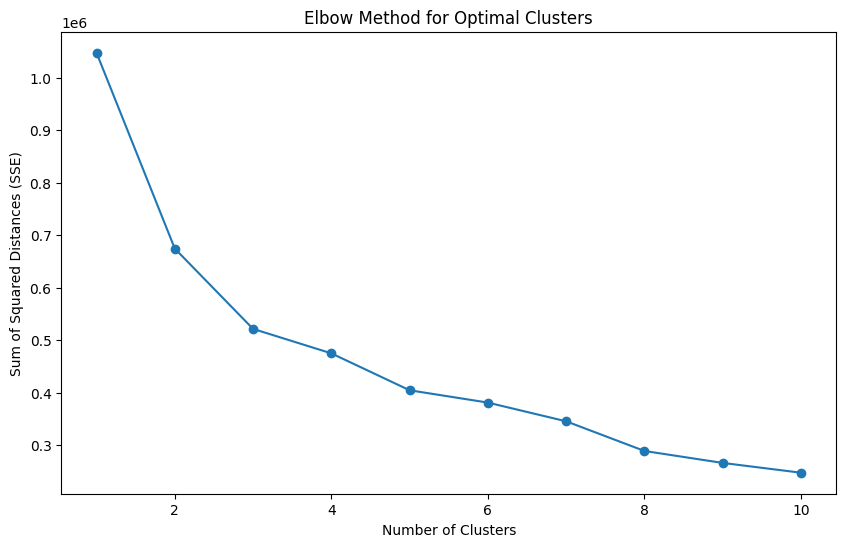

In [ ]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(processed_data)

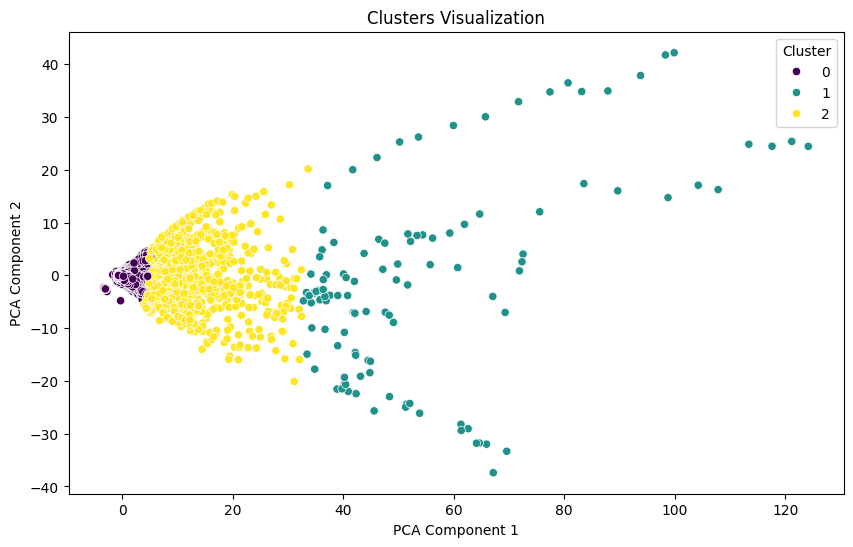

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(processed_data)
data_clustering['PCA1'] = pca_result[:, 0]
data_clustering['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis',
    data=data_clustering
)
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Mengambil hanya bagian numerik dari cluster centers
numerical_cluster_centers = kmeans.cluster_centers_[:, :scaled_numerical_data.shape[1]]

# Mengembalikan ke skala asli untuk kolom numerik
cluster_centers_original = scaler.inverse_transform(numerical_cluster_centers)

# Membuat DataFrame untuk pusat cluster
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=numerical_columns)

# Menambahkan rata-rata untuk kolom kategorikal (jika ingin menampilkan kategorikal juga)
categorical_modes = data_clustering.groupby('Cluster')[categorical_columns].agg(lambda x: x.value_counts().index[0])
final_cluster_centers_df = pd.concat([cluster_centers_df, categorical_modes], axis=1)

print("Cluster Centers (Original Scale):")
final_cluster_centers_df

Cluster Centers (Original Scale):


,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,year,status_label,net_profit_margin_category
0,675.602767,47.613014,131.343016,92.213465,126.746557,1233.255806,979.420443,1108.440270,284.189687,83.729830,303.817812,84.664514,673.117129,848.077459,3.677757,2005.360170,1,0
1,113039.732759,8574.017241,29474.413793,8577.931034,16614.862069,192875.601191,166897.327586,168468.370690,25245.818966,20900.396552,53857.594828,65883.077586,96028.017241,137422.913793,1.155259,2007.853448,1,2
2,19763.982737,1423.559951,5075.906156,2502.037486,3388.094437,43335.333385,29470.601008,35623.410565,8117.125670,3652.346205,9706.618271,7422.756843,21869.035984,24394.694851,1.412030,2006.866467,1,0


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(processed_data, data_clustering['Cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.8198


### Select feature

In [75]:
selected_features = [
    'market_value', 'total_operating_expenses', 'ebit'
]

In [76]:
data_selected = data_clustering[selected_features]

In [77]:
numerical_features = ['market_value', 'total_operating_expenses', 'ebit']
numerical_data = data_selected[numerical_features]

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

In [81]:
processed_data = pd.DataFrame(scaled_numerical_data, columns=numerical_features)
# processed_data[categorical_features] = categorical_data.reset_index(drop=True)

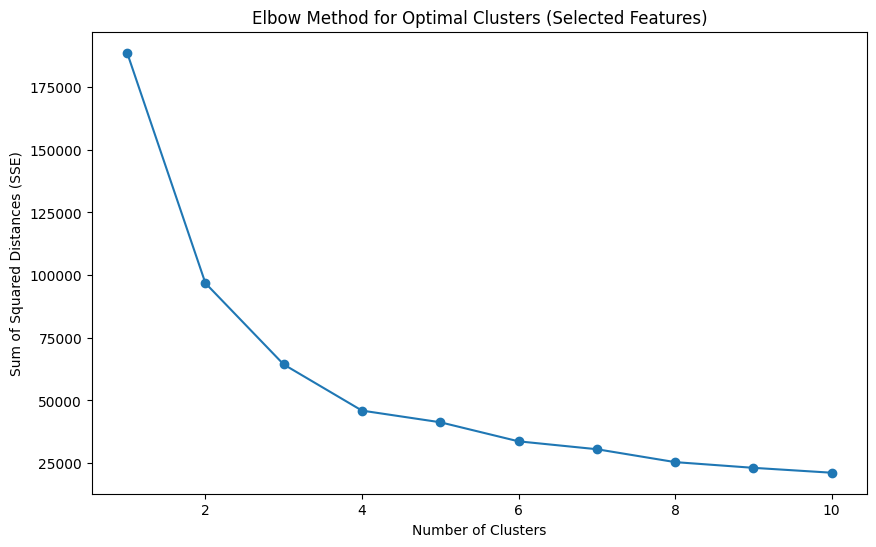

In [82]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal Clusters (Selected Features)')
plt.show()

In [83]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(processed_data)

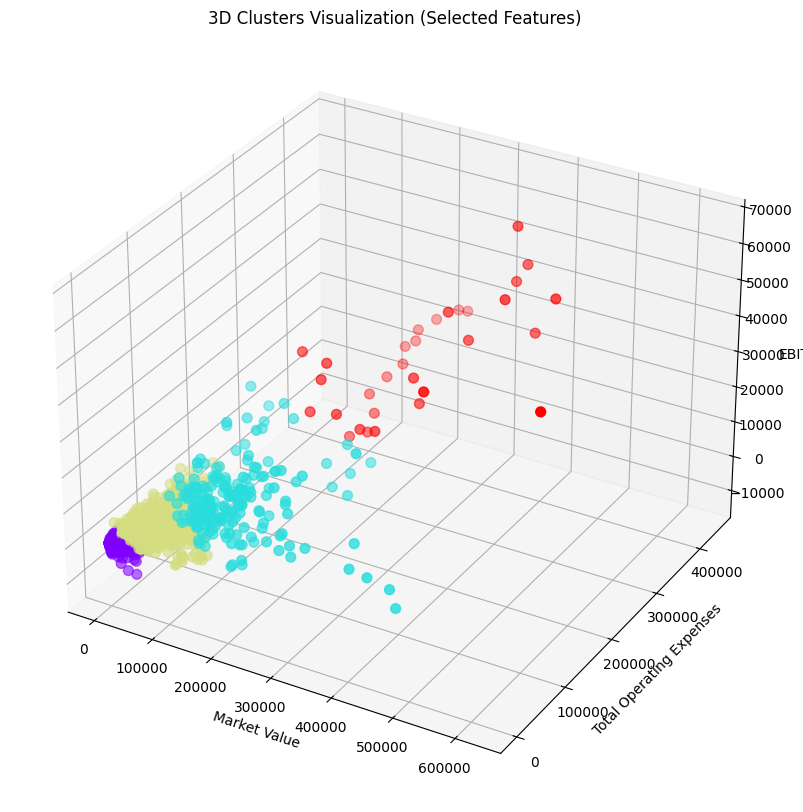

In [84]:
# Visualisasi hasil clustering dalam 3D
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

# Data untuk visualisasi
x = data_clustering['market_value']
y = data_clustering['total_operating_expenses']
z = data_clustering['ebit']
cluster = data_clustering['Cluster']

# Plot data dengan warna berdasarkan cluster
scatter = ax.scatter(x, y, z, c=cluster, cmap="rainbow", s=50)
plt.title("3D Clusters Visualization (Selected Features)")
plt.grid(False)

# Menambahkan label sumbu
ax.set_xlabel('Market Value')
ax.set_ylabel('Total Operating Expenses')
ax.set_zlabel('EBIT')

# Menampilkan plot
plt.show()


In [85]:
# Mengambil cluster centers dari K-Means
cluster_centers_scaled = kmeans.cluster_centers_

# Inverse transform untuk mengembalikan ke skala asli
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)

# Membuat DataFrame untuk cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=numerical_features)

print("Cluster Centers (Original Scale):")
cluster_centers_df

Cluster Centers (Original Scale):


,market_value,total_operating_expenses,ebit
0,1192.729076,870.083799,84.920774
1,165528.140150,54100.308403,13553.547335
2,38660.907436,25474.347735,3316.213353
3,292924.459855,276426.709677,33107.161290


In [86]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(processed_data, data_clustering['Cluster'])
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.9207
